In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [33]:
df = pd.read_csv('/Users/carlosabraham1/Desktop/Amazon Customer Behavior Survey.csv')
df.head(3)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy


In [34]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [35]:
df['Timestamp']  = pd.to_datetime(df['Timestamp'])

/var/folders/9v/kr6g38k54w705z572v333wy80000gp/T/ipykernel_1666/2730290552.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp']  = pd.to_datetime(df['Timestamp'])


In [36]:
df['periodo'] = df['Timestamp'].dt.strftime('%p')
df['periodo'] = df['Timestamp'].dt.floor('D')
df['Periodo'] = df['Timestamp'].dt.strftime("%I:%M %p").str[-2:]
df.head(3)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,periodo,Periodo
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,2023-06-04 00:00:00-05:30,PM
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2023-06-04 00:00:00-05:30,PM
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,2023-06-04 00:00:00-05:30,PM


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype                    
---  ------                                  --------------  -----                    
 0   Timestamp                               602 non-null    datetime64[ns, UTC-05:30]
 1   age                                     602 non-null    int64                    
 2   Gender                                  602 non-null    object                   
 3   Purchase_Frequency                      602 non-null    object                   
 4   Purchase_Categories                     602 non-null    object                   
 5   Personalized_Recommendation_Frequency   602 non-null    object                   
 6   Browsing_Frequency                      602 non-null    object                   
 7   Product_Search_Method                   600 non-null    object                   
 8   Search_Result_Explor

In [38]:
df.drop('periodo', axis=1, inplace=True)

Graficos estadisticos

/var/folders/9v/kr6g38k54w705z572v333wy80000gp/T/ipykernel_1666/1397102649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Periodo', y='Purchase_Frequency', data=df, palette='viridis')


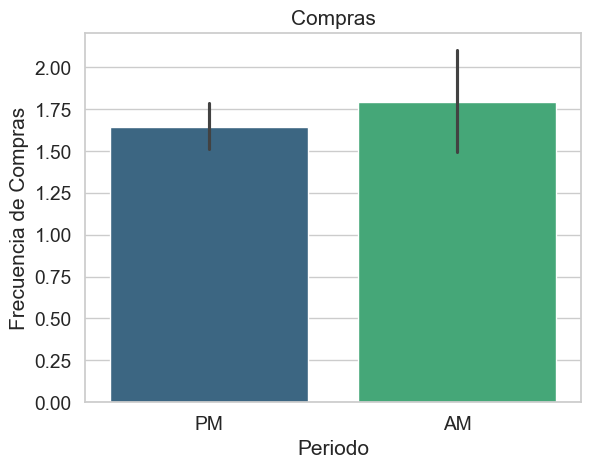

In [65]:
sns.set_style('whitegrid')
sns.barplot(x='Periodo', y='Purchase_Frequency', data=df, palette='viridis')
plt.xlabel('Periodo')
plt.ylabel('Frecuencia de Compras')
plt.title('Compras')

plt.show()

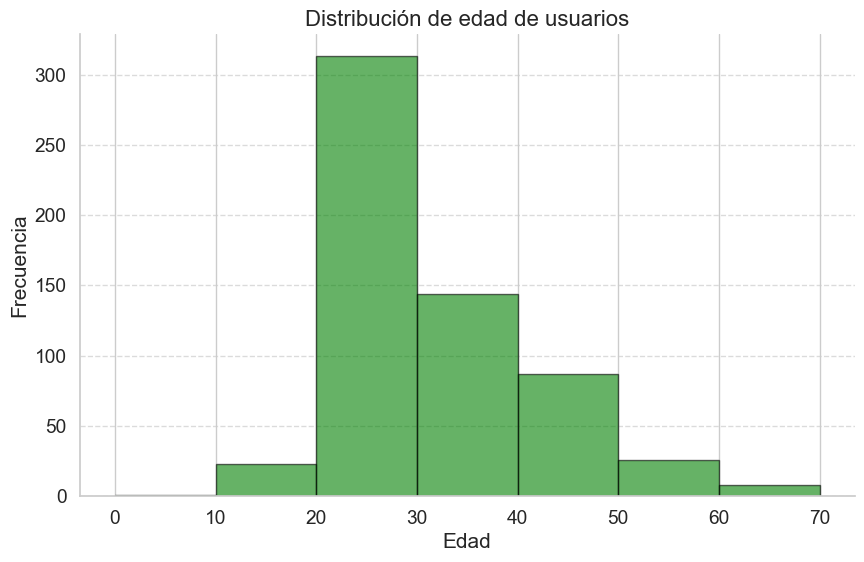

In [41]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70]


plt.figure(figsize=(10, 6))

plt.hist(df['age'], bins=age_bins, color='green', edgecolor='black', alpha=0.6)


plt.title('Distribución de edad de usuarios', fontsize=16)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

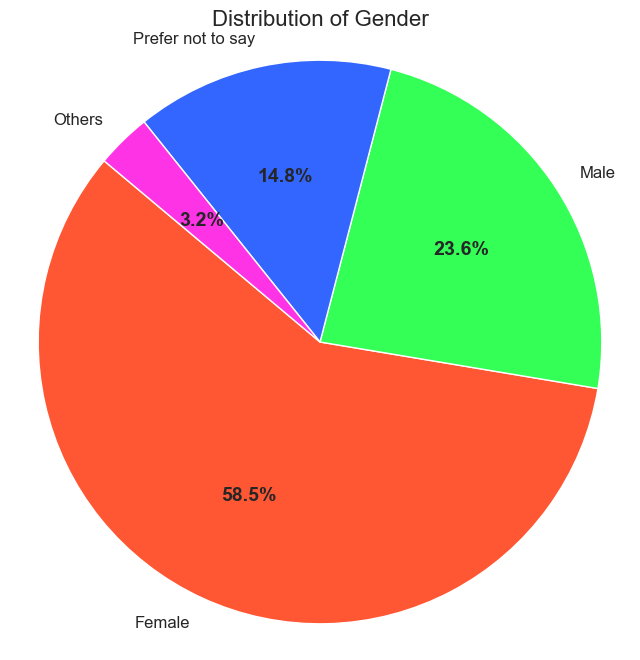

In [42]:
custom_palette = ["#ff5733", "#33ff57", "#3366ff", "#ff33e6", "#33fff4"]


conteo_de_genero = df['Gender'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))


wedges, texts, autotexts = ax.pie(
    conteo_de_genero,
    labels=conteo_de_genero.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_palette,
    wedgeprops={'edgecolor': 'w'}  
)

ax.axis('equal')

ax.set_title('Distribution of Gender', fontsize=16)
plt.setp(autotexts, size=14, weight="bold")  
plt.setp(texts, size=12)  


ax.legend(conteo_de_genero.index, loc='upper right')


ax.legend().set_visible(False)

plt.show()

Definiendo funciones importantes 

In [44]:
def mover_columnas(df, columna_a_mover, columna_destino):
    columnas = df.columns.tolist()
    indice_columna_mover = columnas.index(columna_a_mover)
    indice_columna_destino = columnas.index(columna_destino)

    if indice_columna_mover < indice_columna_destino:
        columna = columnas.pop(indice_columna_mover)
        columnas.insert(columna_destino)
    else:
        columna = columnas.pop(indice_columna_mover)
        columnas.insert(indice_columna_destino + 1, columna)

    df = df[columnas]

    return df        


In [45]:
def identificador_tipo_dato(df):
    cont_cols = df.select_dtypes('number').columns
    cat_cols = [col for col in df.columns if col not in cont_cols]

    print(f"{len(cont_cols)} continuous columns")
    print(f"{len(cat_cols)} categorical columns")


In [46]:
def codificador_datos(df, columnas):
    le = LabelEncoder()
    for col in columnas:
        df[col] = le.fit_transform(df[col])
   

In [47]:
df.dropna(subset=['Product_Search_Method'], how='any', inplace=True)

In [48]:
df = mover_columnas(df,'Periodo', 'Timestamp')
df.columns

Index(['Timestamp', 'Periodo', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

Realizando la encodificación de las columnas 

In [49]:
columnas = ['Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
        'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas' ]
codificador_datos(df, columnas)

df.head(3)

,Timestamp,Periodo,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023-06-04 13:28:19-05:30,PM,23,0,0,0,2,1,1,1,...,4,1,3,2,1,2,0,0,2,11
1,2023-06-04 14:30:44-05:30,PM,23,0,3,8,2,0,1,1,...,3,0,0,2,1,1,2,1,8,11
2,2023-06-04 17:04:56-05:30,PM,24,3,0,20,0,0,1,1,...,3,0,3,0,3,0,2,2,2,9


<Axes: >

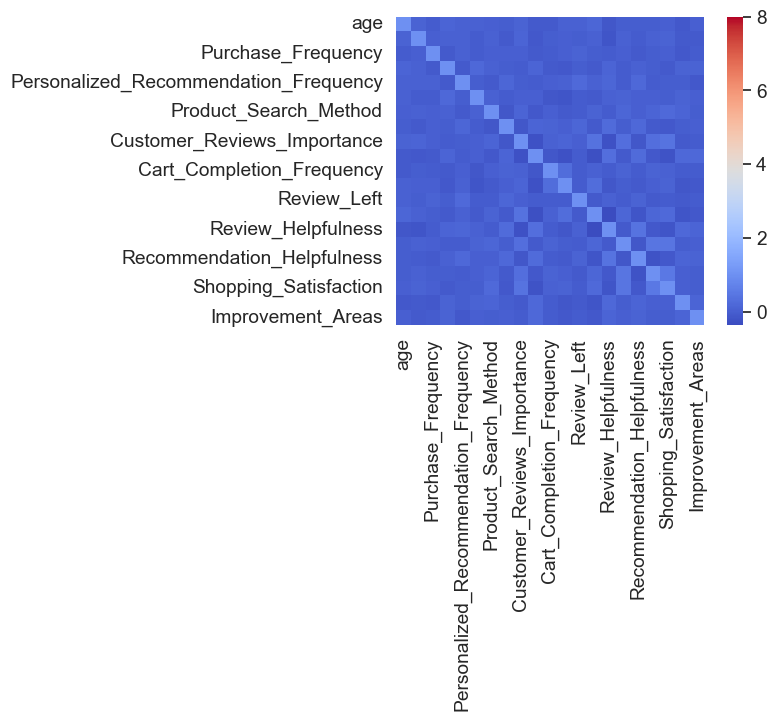

In [51]:
cont_cols = df.select_dtypes('number').columns
corrmat = df[cont_cols].corr()
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corrmat, vmax=8, square=True, cmap='coolwarm')


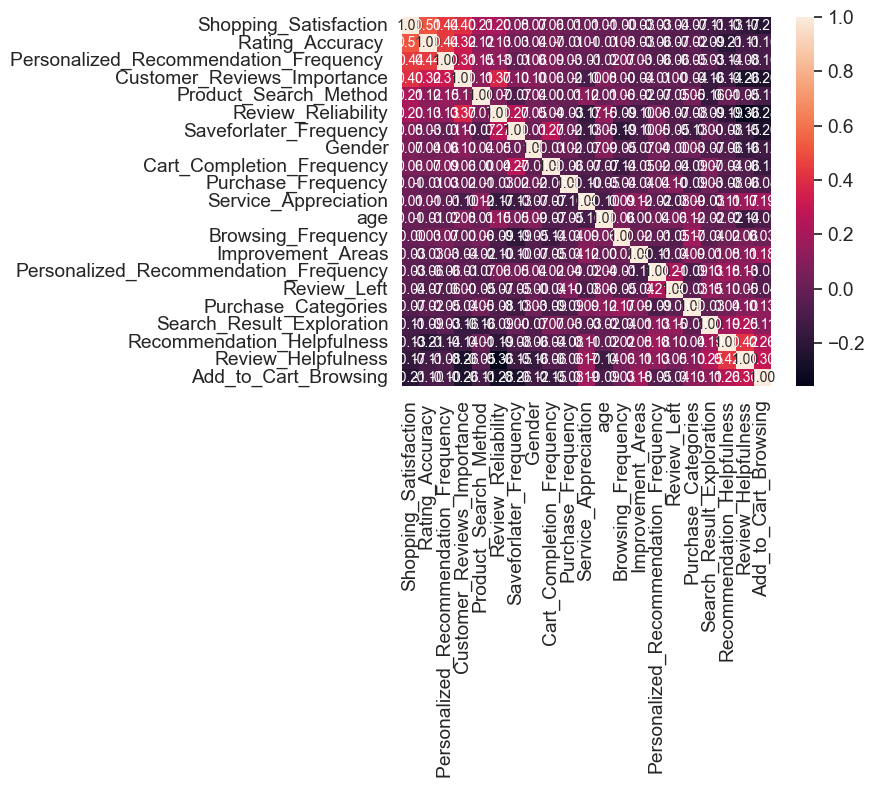

In [52]:
k = 25
columna_objetivo = 'Shopping_Satisfaction'
cols = corrmat.nlargest(k, columna_objetivo)[columna_objetivo].index
cm = np.corrcoef(df[cols].values.T)

variables = []

for col in cols:
    if col != columna_objetivo:
        correlation = np.corrcoef(df[col], df[columna_objetivo])[0,1]
        variables.append((col, correlation))
variables = sorted(variables, key=lambda x:abs(x[1]), reverse=True)


sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [53]:
df2 = pd.DataFrame(variables)
df2 = df2.sort_values(by=df2.columns[1], ascending=False)
df2 = df2[df2[df2.columns[1]]>0.05]

df2.head(3)

,0,1
0,Rating_Accuracy,0.514242
1,Personalized_Recommendation_Frequency,0.438003
2,Customer_Reviews_Importance,0.401729


In [54]:
variables_modelo = df2[0].tolist()
variables_modelo

['Rating_Accuracy ',
 'Personalized_Recommendation_Frequency ',
 'Customer_Reviews_Importance',
 'Product_Search_Method',
 'Review_Reliability',
 'Saveforlater_Frequency',
 'Gender',
 'Cart_Completion_Frequency']

Realizando el entramiento y evaluación de arboles de decisión 


In [55]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(
    df[variables_modelo],
 df[columna_objetivo],
 test_size=0.33
)

In [56]:
x = df[variables_modelo]

y= df[columna_objetivo]

In [57]:
reg =  DecisionTreeRegressor(random_state=0)
reg.fit(x_entrenamiento,y_entrenamiento)
y_pred = reg.predict(x)

In [58]:
DFR_results = []


mae_DFR = mean_absolute_error(y, y_pred)
mse_DFR = mean_squared_error(y, y_pred)
rmse_DFR = np.sqrt(mse_DFR)
r2_DFR = r2_score(y, y_pred)



In [59]:
print('Mean absolute error:', mae_DFR)
print('Mean square error:', mse_DFR)
print('Root mean square error:', rmse_DFR)
print('R**2 Score',r2_DFR)



Mean absolute error: 0.32069444444444445
Mean square error: 0.5406031378600823
Root mean square error: 0.7352571916411851
R**2 Score 0.47274805310626034


In [60]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_entrenamiento,y_entrenamiento)
y_pred = rf_regressor.predict(x)

In [61]:
RFR_results = []


mae_RFR = mean_absolute_error(y, y_pred)
mse_RFR = mean_squared_error(y, y_pred)
rmse_RFR = np.sqrt(mse_RFR)
r2_RFR = r2_score(y, y_pred)

In [62]:
print('Mean absolute error:', mae_RFR)
print('Mean square error:', mse_RFR)
print('Root mean square error:', rmse_RFR)
print('R**2 Score',r2_RFR)



Mean absolute error: 0.3861134013671514
Mean square error: 0.33585903781035065
Root mean square error: 0.5795334656517694
R**2 Score 0.6724356202068558
